In [ ]:
from data import load_data, generate_loaders

tensors = load_data(fname='/Users/julian/standardized_data_set.npz')

(139, 79, 95, 79, 4) (139, 79, 95, 79) (139, 79, 95, 79, 4) (139, 79, 95, 79)


In [ ]:

from data import load_data, generate_loaders

tensors[2] = tensors[2][:10]
tensors[3] = tensors[3][:10]
_, mri_sets = generate_loaders(tensors, batch_size=64)

In [21]:
from tqdm import tqdm

loader = mri_sets['train']
list = [(inputs, outputs) for (inputs, outputs) in tqdm(loader)]


    






  0%|          | 0/10 [00:00<?, ?it/s]



100%|██████████| 10/10 [00:00<00:00, 169.53it/s]

In [32]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

plt.switch_backend('agg')
ncol = 5
nrow = list[0][0].shape[0] + 2
figure = plt.figure(figsize=(ncol + 1, nrow + 1))
gs = gridspec.GridSpec(nrow, ncol,
                       wspace=1, hspace=0.25,
                       top=1. - 0.5 / (nrow + 1), bottom=0.5 / (nrow + 1),
                       left=0.5 / (ncol + 1), right=1 - 0.5 / (ncol + 1))

<Figure size 432x4824 with 0 Axes>

In [33]:
# draw image on canvas
def visual_add(image, i_subj, i_image, gs, image_id=None):
    i_col = i_image
    i_row = i_subj

    # plot image
    ax = plt.subplot(gs[i_row, i_col])
    if image_id is not None: ax.set_title(image_id, fontdict={'fontsize': 10})
    plt.imshow(-image.T)
    plt.set_cmap('Greys')
    plt.axis('off')

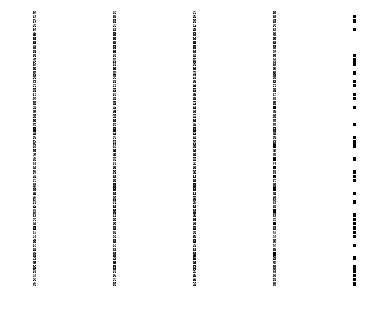

In [41]:
slices_in, slices_out = list[0]
i_slice = 0
for i_slice, slice in enumerate(slices_in):
    i_image = 0
    
    for channel in range(slice.shape[0]):
        visual_add(slice[channel], i_slice, i_image, gs, '')
        i_image += 1
        
    visual_add(slices_out[i_slice, 0], i_slice, i_image, gs, '')

import os

data_dir = '/Users/julian/temp'
plt.ioff()
plt.switch_backend('agg')
figure_path = os.path.join(data_dir, 'dataloader_visualisation.svg')
figure.savefig(figure_path, dpi='figure', format='svg')
plt.close(figure)

In [ ]:
list[0][1].shape